In [1]:
%matplotlib notebook

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import simulations

In [5]:
from functools import partial

## Second version of our model (sum of exponents multiplied by velocity)

Current version of our model without wind is:
$$\ddot{x_{i}}=A_{i}\Big[1-\frac{\dot{x_{i}}}{V_{i}}-\frac{\dot{x_{i}}}{\kappa}\cdot \sum_{0\leq j <i}K_{j}\exp\Big(\frac{x_{i}-x_{j}}{\omega}\Big)\Big]$$

### Situation 1: each drone starts with its' optimal velocity, drones are sorted according to their optimal velocities. Each drone has the same K=1 and A=0.5.

In [6]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([5,4,3,2,1])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [7]:
t, v = simulations.euler(initial_time=0, end_time=30, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,5,4,3,2,1]), derivative=d)

<IPython.core.display.Javascript object>


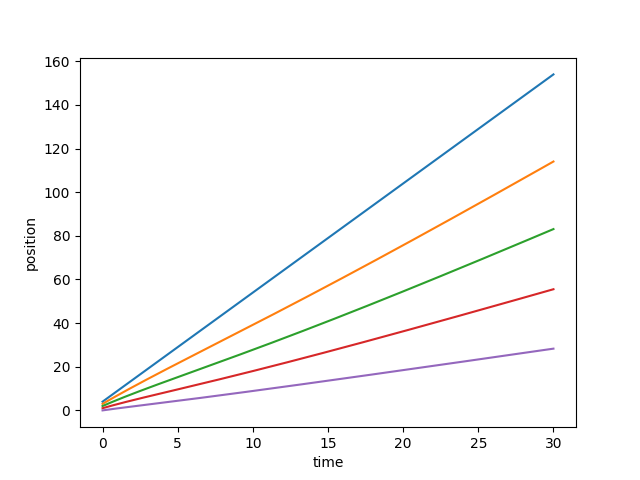

In [8]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 2: each drone starts with its' optimal velocity, but drones are not sorted according to their optimal velocities. Each drone has the same K=1 and A=0.5.

In [9]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([1,2,3,4,5])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [10]:
t, v = simulations.euler(initial_time=0, end_time=15, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,1,2,3,4,5]), derivative=d)

<IPython.core.display.Javascript object>


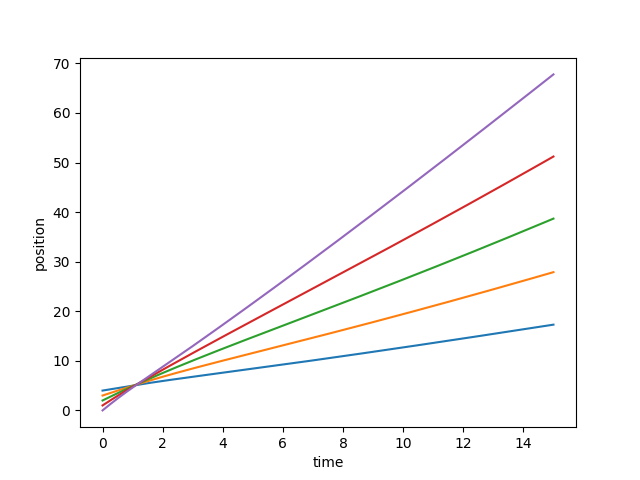

In [11]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 3: first drone has K>>kappa and is very slow.

In [12]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([0.01,2,3,4,5])
kap = 10
K=np.array([100,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [13]:
t, v = simulations.euler(initial_time=0, end_time=30, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,0.01,2,3,4,5]), derivative=d)

<IPython.core.display.Javascript object>


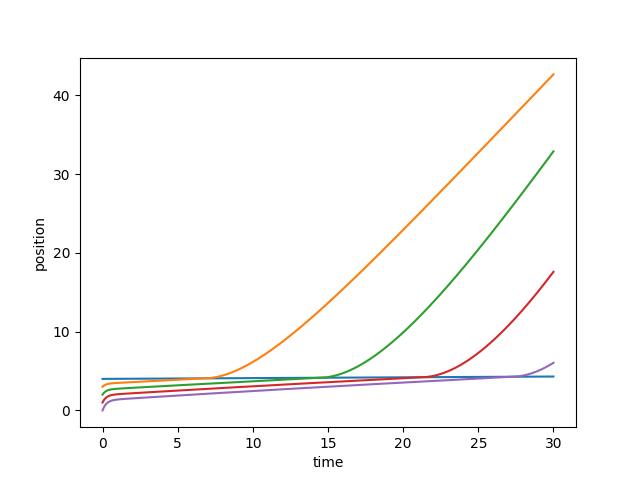

In [14]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 4: several drones have the same starting position and zero velocity, they are the same except for maximum acceleration.

In [15]:
A = np.array([10,5,1,0.5,0.1])
opt = np.array([30,30,30,30,30])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [16]:
t, v = simulations.euler(initial_time=0, end_time=60, number_of_points=1000000, initial_value=np.array([0,0,0,0,0,0,0,0,0,0]), derivative=d)

<IPython.core.display.Javascript object>


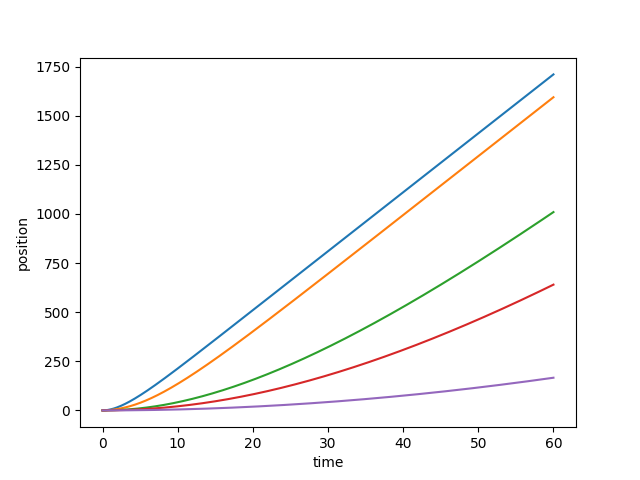

In [17]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 5: some complicated situation with lots of overtaking.

In [18]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([7,10,3,5,2])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [19]:
t, v = simulations.euler(initial_time=0, end_time=100, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,7,3,15,0,25]), derivative=d)

<IPython.core.display.Javascript object>


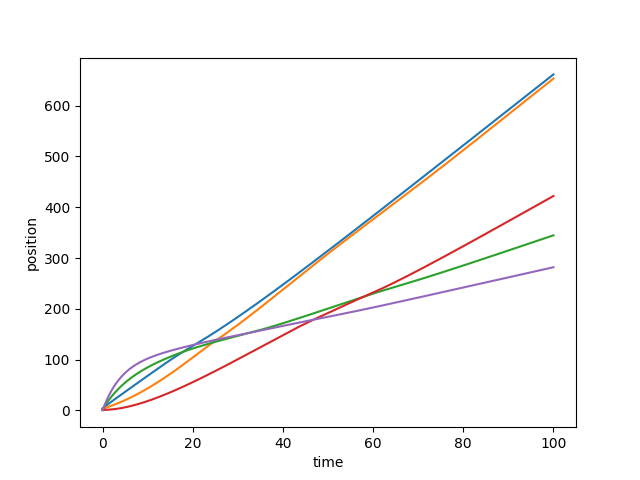

In [20]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

## Version with wind added

We simply add a component modelling wind-induced acceleration
$$\ddot{x_{i}}=A_{i}\Big[1-\frac{\dot{x_{i}}}{V_{i}}-\frac{\dot{x_{i}}}{\kappa}\cdot \sum_{0\leq j <i}K_{j}\exp\Big(\frac{x_{i}-x_{j}}{\omega}\Big)\Big]+\frac{H_{i}}{m_{i}},$$
where $H_{i}$ is wind force for $i$-th drone. To compute this wind force we can use a formula:
$$H_{i}=\pm\frac{1}{2}\rho C_{d} A_{f}v^{2}_{wind}.$$

### Situation 1: each drone flies with its' optimal velocity, the fastest starts as the last one. In the first part of simulation (t<10) wind-induced acceleration equals -0.01, in the second part: -1.5.

$\textbf{Edit:}$ this situation doesn't make much sense, because the function modelling wind force is not continuous and we can't be guaranteed that the solution exists.

In [12]:
A = np.array([2,2,2,2,2])
opt = np.array([1,2,3,4,5])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
change_time=10
wind_force=[-0.01,-1.5]
m = np.array([1,1,1,1,1])
wrapped = partial(simulations.discontinuous_wind, change_time=change_time, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om, model=simulations.model3, wind_function=wrapped, m=m)

In [13]:
t, v = simulations.euler(initial_time=0, end_time=20, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,1,2,3,4,5]), derivative=d)

<IPython.core.display.Javascript object>


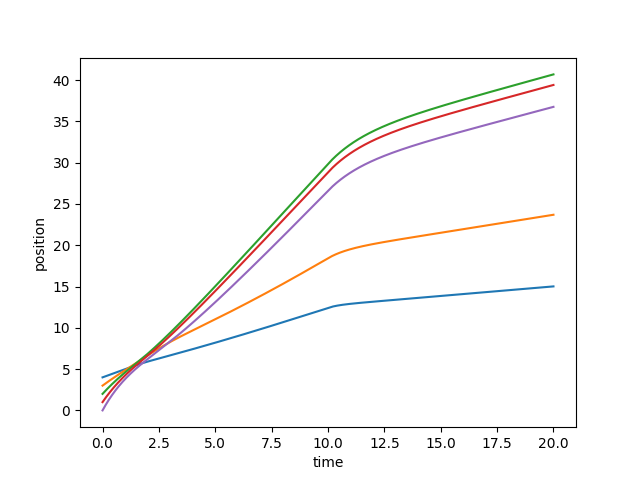

In [14]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 2: First drone has K>>kappa and is very slow. The others are faster and try to overtake. In the first part of simulation (t<5) wind-induced acceleration equals 1 and in the second part: -0.25.

$\textbf{Edit:}$ this situation doesn't make much sense, because the function modelling wind force is not continuous and we can't be guaranteed that the solution exists.

In [15]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([0.01,2,3,4,5])
kap = 10
K=np.array([100,1,1,1,1])
om = 10
change_time=5
wind_force=[1,-0.25]
m = np.array([1,1,1,1,1])
wrapped = partial(simulations.discontinuous_wind, change_time=change_time, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,wind_function=wrapped,model=simulations.model3, m=m)

In [16]:
t, v = simulations.euler(initial_time=0, end_time=35, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,0.01,2,3,4,5]), derivative=d)

<IPython.core.display.Javascript object>


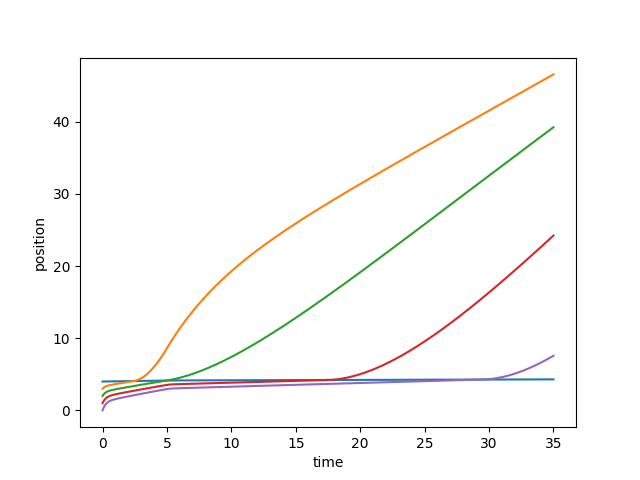

In [17]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 3: when wind blows, drones can be faster than their optimal velocity.

(Here we have a constant wind force, so the solution exists.)

In [6]:
A = np.array([0.5])
opt = np.array([0.5])
kap = 10
K=np.array([1])
om = 10
wind_force=10
m=np.array([1])
wrapped=partial(simulations.constant_wind, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,wind_function=wrapped,model=simulations.model3, m=m)

In [7]:
t, v = simulations.euler(initial_time=0, end_time=20, number_of_points=1000000, initial_value=np.array([10,0.5]), derivative=d)

<IPython.core.display.Javascript object>


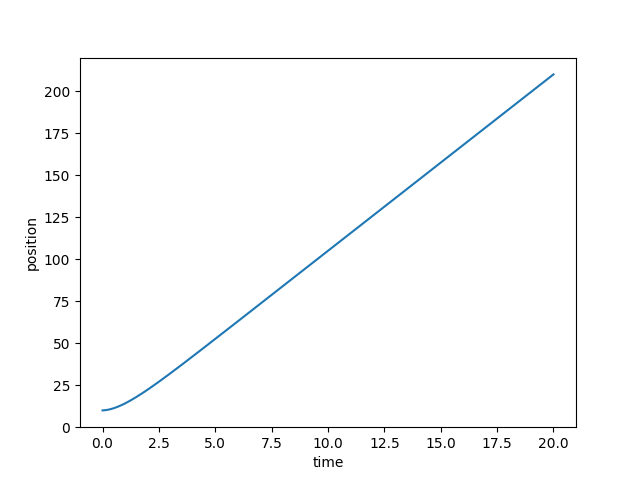

In [8]:
plt.plot(t,v[:,0])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 4: when wind blows, drones can have negative velocity.

(Here we have a constant wind force, so the solution exists.)

In [9]:
A = np.array([0.5])
opt = np.array([0.5])
kap = 10
K=np.array([1])
om = 10
wind_force=-10
wrapped=partial(simulations.constant_wind, wind_force=wind_force)
d = partial(simulations.derivative_with_wind,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,wind_function=wrapped,model=simulations.model3,m=m)

In [10]:
t, v = simulations.euler(initial_time=0, end_time=20, number_of_points=1000000, initial_value=np.array([10,0.5]), derivative=d)

<IPython.core.display.Javascript object>


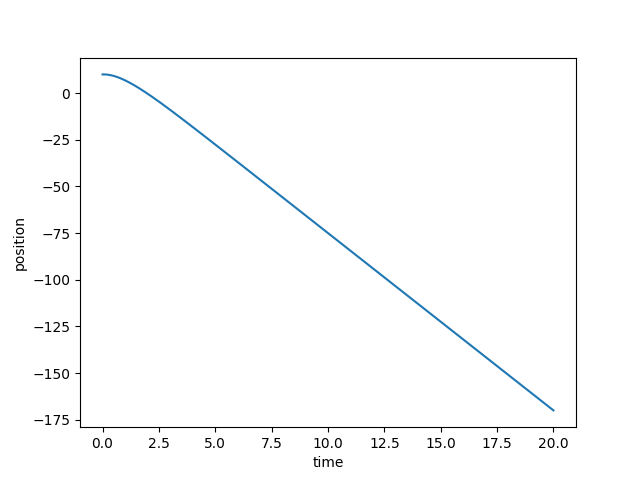

In [11]:
plt.plot(t,v[:,0])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 5